# Graphs

Today: graph visualization (graphviz)
Upcoming: graph computation (from classes)

Two main components:
- **Nodes**: some kind of entity. Examples: Person, Computer, Place, Event, etc., 
- **Edges**: relationships between those entities.

### Examples

* Git: https://www.oreilly.com/library/view/git-pocket-guide/9781449327507/ch01.html#fig0101
* Political Allignment: https://www.reddit.com/r/dataisbeautiful/comments/1q7b3s/voting_relationships_between_senators_in_the/
* Evolution: https://commons.wikimedia.org/wiki/File:The_Ancestors_Tale_Mammals_Phylogenetic_Tree_in_mya.png
* Friendship: https://facebook.com/notes/facebook-engineering/visualizing-friendships/469716398919/
* Accounting: https://wisc-ds-projects.github.io/f19/past/langston-ellen-zan.pdf#page=22
* Transit: https://arxiv.org/pdf/1611.01890.pdf#page=14

### Graphviz Setup

- Execute the below terminal commands

```
sudo apt install -y graphviz
pip3 install graphviz
```

In [1]:
# import statements
from graphviz import Graph, Digraph

### `Graph` Syntax

- Creating `Graph` object:
```python
g = Graph()
dg = Digraph()
```
- Creating a `node`:
```python
g.node(<name>, <description>)
```
- Creating an `edge`:
```python
g.edge(<SOURCE NODE>, <TARGET NODE>, label=<description>, color=<value>, pendwidth=<value>)
```
- Displaying the graph object instance invokes `_repr_svg_` (similar to `_repr_html`)
- We could directly add edges which will add missing nodes.

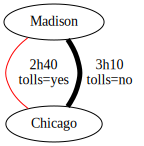

In [2]:
# create a graph
g = Graph()
g.node("A", "Madison")
g.node("B", "Chicago")
g.edge("A", "B", label="2h40\ntolls=yes", color="red")
g.edge("A", "B", label="3h10\ntolls=no", penwidth="5")
g

### Be careful: `graphviz` does not throw an error when you use incorrect parameter name!
- Read through "graphviz attributes" to see details: https://graphviz.org/doc/info/attrs.html.

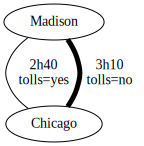

In [3]:
# create a graph with a wrong parameter (colors in this example)
g = Graph()
g.node("A", "Madison")
g.node("B", "Chicago")
g.edge("A", "B", label="2h40\ntolls=yes", colors="red")
g.edge("A", "B", label="3h10\ntolls=no", penwidth="5")
g

## Paths

A **path** is a sequence of edges to get from one node to another.

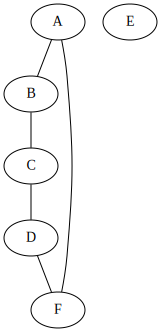

In [4]:
# not connected
g = Graph()
g.edge("A", "B")
g.edge("B", "C")
g.edge("C", "D")
g.edge("D", "F")
g.edge("A", "F")
g.node("E")
g

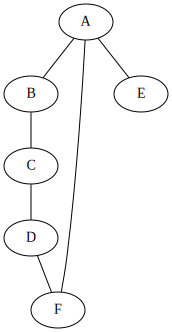

In [5]:
# connected
g = Graph()
g.edge("A", "B")
g.edge("B", "C")
g.edge("C", "D")
g.edge("D", "F")
g.edge("A", "F")
g.edge("A", "E")
g

### Observations:

- no path between A and E
- B => A => F is a path
- B => C => D => F is a path
- future: what is the SHORTEST path between two nodes

### More terminology

- **connected** means there is a path between any two nodes
- **cycle** means a path with same start+end, no repeating edges; for example: A,B,C,D,F,A

## Directed Graphs: DAGs (Directed Acyclic Graphs - no cycles)

- **parent** means the outgoing end of an edge
- **child** means the incoming end of an edge
- **strongly connected** (same as **connected** with direction) => there's a path from any start to any end
- **weakly connected** => it would be connected if we ignored the direction of edges

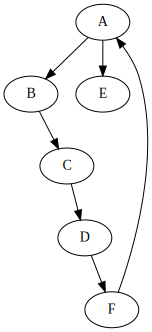

In [6]:
# weakly connected
# cyclic
g = Digraph()
g.edge("A", "B")
g.edge("B", "C")
g.edge("C", "D")
g.edge("D", "F")
g.edge("F", "A")
g.edge("A", "E")
g

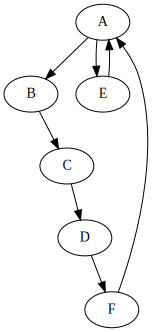

In [7]:
# strongly connected
g = Digraph()
g.edge("A", "B")
g.edge("B", "C")
g.edge("C", "D")
g.edge("D", "F")
g.edge("F", "A")
g.edge("A", "E")
g.edge("E", "A")
g

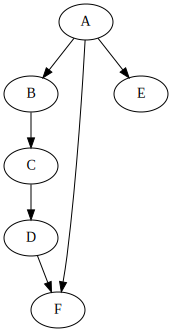

In [8]:
# acyclic
g = Digraph()
g.edge("A", "B")
g.edge("B", "C")
g.edge("C", "D")
g.edge("D", "F")
g.edge("A", "F")
g.edge("A", "E")
g

## Trees

- **Tree**: DAG where one node (the **root**) has no parents and all others have exactly one parent
- **root**: any node with no parents
- **leaf**: is any node with no children

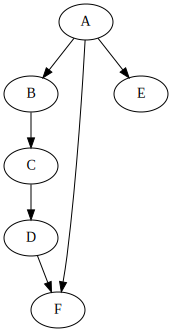

In [9]:
# not a tree
g = Digraph()
g.edge("A", "B")
g.edge("B", "C")
g.edge("C", "D")
g.edge("D", "F")
g.edge("A", "F")
g.edge("A", "E")
g

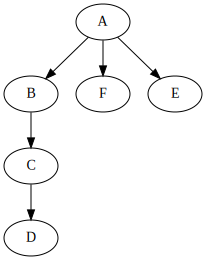

In [10]:
# not a tree
g = Digraph()
g.edge("A", "B")
g.edge("B", "C")
g.edge("C", "D")
#g.edge("D", "F")
g.edge("A", "F")
g.edge("A", "E")
g